In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline
import datetime
from datetime import timedelta
from sklearn import metrics
import pylab

/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/raei/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/raei/anaconda3/lib/python3.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
ntu = pd.read_csv('ipodam-data.csv')
ntu.head()

,Date and Time,"Turbidity, NTU","Rainfall, mm",Flow
0,6/1/18 0:00,3.20,0.0,0.1209
1,6/1/18 1:00,2.94,0.0,0.1202
2,6/1/18 2:00,3.06,0.0,0.1196
3,6/1/18 3:00,3.19,0.0,0.1189
4,6/1/18 4:00,2.72,0.0,0.1183


In [3]:
ntu.tail(10)

,Date and Time,"Turbidity, NTU","Rainfall, mm",Flow
1966,8/21/18 22:00,127.0,0.0,12.1594
1967,8/21/18 23:00,121.0,0.0,11.3067
1968,NaN,NaN,NaN,NaN
1969,NaN,NaN,NaN,NaN
1970,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN
1972,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN
1974,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN


In [4]:
ntu = ntu.iloc[0:1968,:]
ntu.tail()

,Date and Time,"Turbidity, NTU","Rainfall, mm",Flow
1963,8/21/18 19:00,134.0,0.0,13.3637
1964,8/21/18 20:00,126.0,0.0,11.5715
1965,8/21/18 21:00,118.0,2.0,11.5206
1966,8/21/18 22:00,127.0,0.0,12.1594
1967,8/21/18 23:00,121.0,0.0,11.3067


In [5]:
#Set Date Time as index
ntu['Date and Time'] = pd.to_datetime(ntu['Date and Time'], format = '%m/%d/%y %H:%M')
ntu.set_index('Date and Time', inplace=True)
ntu.head()

,"Turbidity, NTU","Rainfall, mm",Flow
Date and Time,,,
2018-06-01 00:00:00,3.20,0.0,0.1209
2018-06-01 01:00:00,2.94,0.0,0.1202
2018-06-01 02:00:00,3.06,0.0,0.1196
2018-06-01 03:00:00,3.19,0.0,0.1189
2018-06-01 04:00:00,2.72,0.0,0.1183


In [6]:
ntu.dtypes

Turbidity, NTU    float64
Rainfall, mm      float64
Flow              float64
dtype: object

In [7]:
#Checking for any missing hour
pd.date_range(start = '2018-06-01 00:00:00', end = '2018-08-21 23:00:00', freq='1H').difference(ntu.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='H')

In [8]:
#Checking for missing values
ntu.isna().sum()

Turbidity, NTU    0
Rainfall, mm      0
Flow              0
dtype: int64

In [9]:
ntu.corr()

,"Turbidity, NTU","Rainfall, mm",Flow
"Turbidity, NTU",1.000000,0.151604,0.439391
"Rainfall, mm",0.151604,1.000000,0.423182
Flow,0.439391,0.423182,1.000000


In [10]:
ntu.iloc[[0,-1]]

,"Turbidity, NTU","Rainfall, mm",Flow
Date and Time,,,
2018-06-01 00:00:00,3.2,0.0,0.1209
2018-08-21 23:00:00,121.0,0.0,11.3067


I will now inspect how fast does the rainfall affect turbidity.

In [12]:
ntu = ntu[['Turbidity, NTU','Flow','Rainfall, mm']]
s = pd.DataFrame()
lags = range(1,12)
for t in lags:
    s[str(t)] = ntu['Rainfall, mm'].shift(t)
ntu = ntu.join(s)
ntu.iloc[500:510]

,"Turbidity, NTU",Flow,"Rainfall, mm",1,2,3,4,5,6,7,8,9,10,11
Date and Time,,,,,,,,,,,,,,
2018-06-21 20:00:00,169.0,95.5969,0.8,1.0,5.6,34.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-21 21:00:00,166.0,81.3865,0.2,0.8,1.0,5.6,34.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-21 22:00:00,110.0,67.7075,0.0,0.2,0.8,1.0,5.6,34.2,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-21 23:00:00,75.5,55.9510,0.0,0.0,0.2,0.8,1.0,5.6,34.2,0.0,0.0,0.0,0.0,0.0
2018-06-22 00:00:00,44.5,46.2714,0.0,0.0,0.0,0.2,0.8,1.0,5.6,34.2,0.0,0.0,0.0,0.0
2018-06-22 01:00:00,43.2,38.3568,0.0,0.0,0.0,0.0,0.2,0.8,1.0,5.6,34.2,0.0,0.0,0.0
2018-06-22 02:00:00,30.8,31.8829,0.0,0.0,0.0,0.0,0.0,0.2,0.8,1.0,5.6,34.2,0.0,0.0
2018-06-22 03:00:00,27.5,26.5878,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,1.0,5.6,34.2,0.0
2018-06-22 04:00:00,30.1,22.2600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,1.0,5.6,34.2


In [13]:
ntu.corr().iloc[:,0:1]

,"Turbidity, NTU"
"Turbidity, NTU",1.000000
Flow,0.439391
"Rainfall, mm",0.151604
1,0.174595
2,0.199223
3,0.222695
4,0.226972
5,0.216348
6,0.211236
7,0.214310


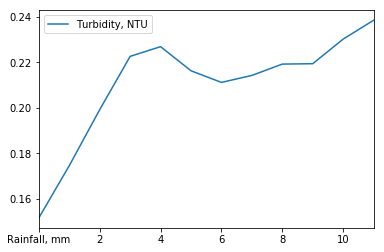

In [14]:
ntu.corr().iloc[2:,0:1].plot()

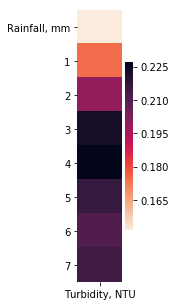

In [19]:
plt.figure(figsize=(1,5))
sns.heatmap(ntu.corr().iloc[2:10,0:1], cmap = sns.cm.rocket_r)
plt.savefig('corr.png', dpi=500, transparent=True, bbox_inches = 'tight')

We can see the first peak at t+4, we will keep that lag.

In [20]:
df = ntu[['Turbidity, NTU','Flow','4']]
df.head()

,"Turbidity, NTU",Flow,4
Date and Time,,,
2018-06-01 00:00:00,3.20,0.1209,NaN
2018-06-01 01:00:00,2.94,0.1202,NaN
2018-06-01 02:00:00,3.06,0.1196,NaN
2018-06-01 03:00:00,3.19,0.1189,NaN
2018-06-01 04:00:00,2.72,0.1183,0.0


In [21]:
df = df.dropna(how='any',axis=0)
df.columns = df.columns.str.replace('4', 'Rainfall')
df.head()

,"Turbidity, NTU",Flow,Rainfall
Date and Time,,,
2018-06-01 04:00:00,2.72,0.1183,0.0
2018-06-01 05:00:00,2.61,0.1176,0.0
2018-06-01 06:00:00,2.75,0.1170,0.0
2018-06-01 07:00:00,2.62,0.1163,0.0
2018-06-01 08:00:00,2.57,0.1157,0.0


In [22]:
df.corr()

,"Turbidity, NTU",Flow,Rainfall
"Turbidity, NTU",1.000000,0.439125,0.226972
Flow,0.439125,1.000000,0.611358
Rainfall,0.226972,0.611358,1.000000


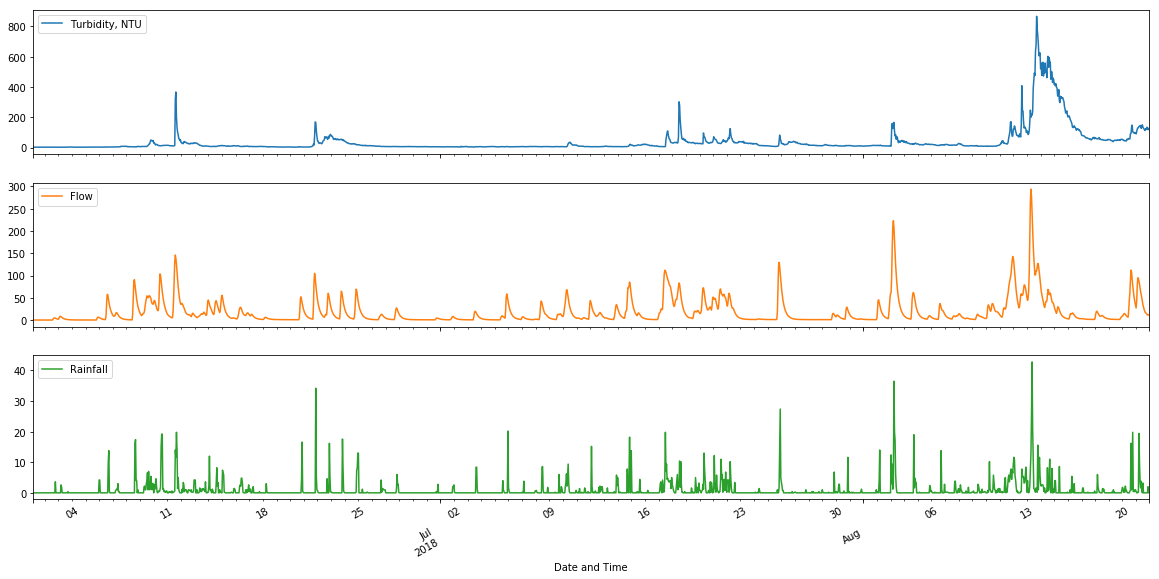

In [23]:
fig1, fig2, fig3 = df.plot(subplots=True, figsize=(20, 10))
fig1.legend(loc='upper left')
fig2.legend(loc='upper left')
fig3.legend(loc='upper left')
plt.show()

Check for seasonality.

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

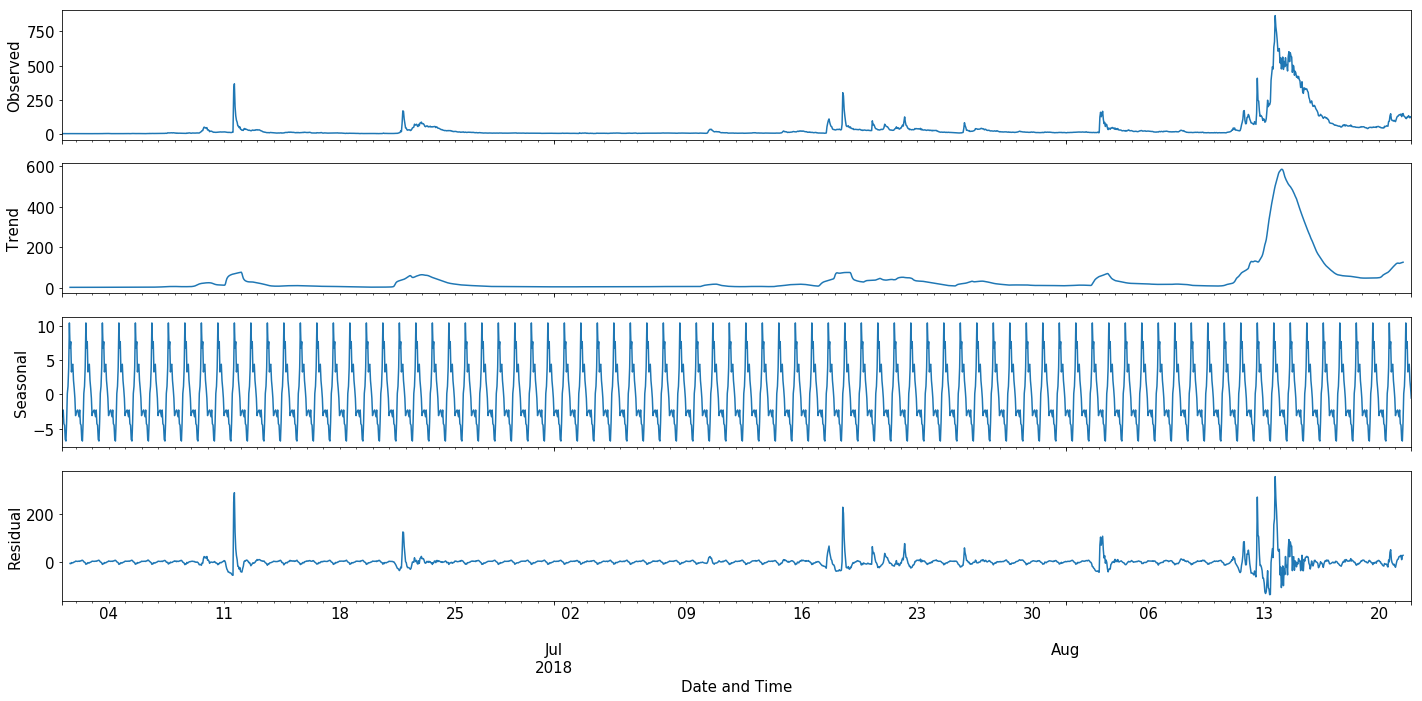

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
rcParams['font.size'] = 15
# rcParams['legend.fontsize'] = 'medium'
series = df['Turbidity, NTU']
res = seasonal_decompose(series, model='additive')
fig = res.plot()
plt.show()

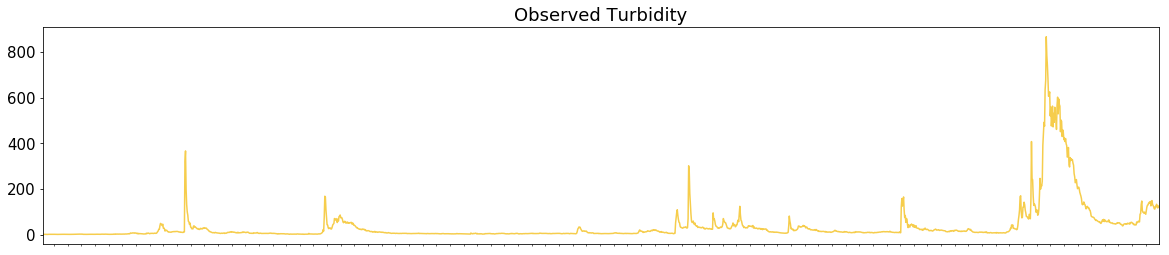

In [26]:
rcParams['figure.figsize'] = 20, 4
rcParams['font.size'] = 15
res.observed.plot(color='#f6cd4cff')
plt.xlabel('')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Observed Turbidity')
plt.savefig('001.png', dpi=500, transparent=True, bbox_inches = 'tight')

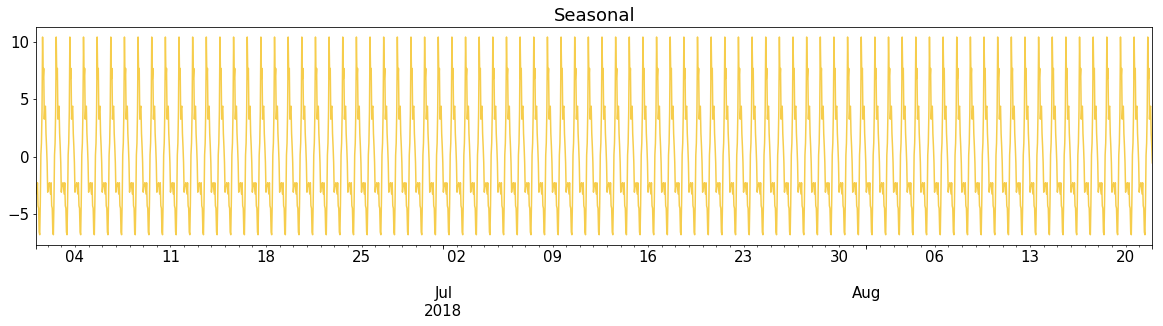

In [27]:
rcParams['figure.figsize'] = 20, 4
rcParams['font.size'] = 15
res.seasonal.plot(color='#f6cd4c')
plt.xlabel('')
plt.title('Seasonal')
plt.savefig('000.png', dpi=500, transparent=True, bbox_inches = 'tight')

In [28]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ntu['Turbidity, NTU'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.164723
p-value: 0.000756


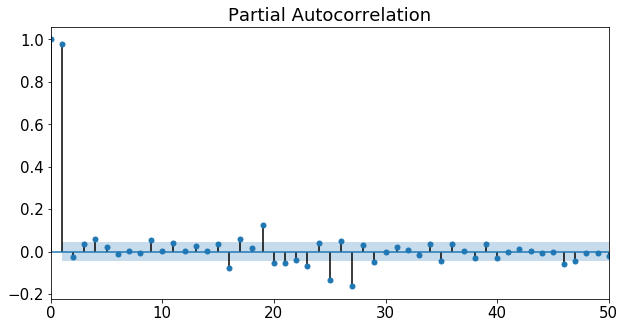

In [29]:
from pandas import Series

from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 10, 5
series = ntu[['Turbidity, NTU']]
plot_pacf(series, lags=50)
plt.xlim(0,50)
plt.show()

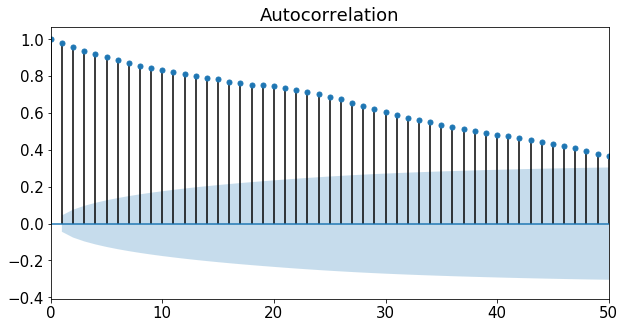

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
plt.xlim(0,50)
plt.show()

### Forecasting

In [31]:
import statsmodels.api as sm

In [32]:
y = df['Turbidity, NTU']
X = df[['Rainfall', 'Flow']]

n = 230
X_train = X.iloc[:-n]
X_test = X.iloc[-n:]
y_train = y.iloc[:-n]
y_test = y.iloc[-n:]

In [33]:
import pmdarima as pm
model = pm.auto_arima(y_train, exogenous=X_train,
                           start_p=1, start_q=1, 
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

model.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 7); AIC=13334.382, BIC=13372.561, Fit time=2.475 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 7); AIC=15808.380, BIC=15830.196, Fit time=0.135 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 7); AIC=14102.850, BIC=14135.574, Fit time=0.938 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 7); AIC=13887.714, BIC=13920.439, Fit time=1.450 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 7); AIC=13326.444, BIC=13370.077, Fit time=4.266 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 7); AIC=13887.202, BIC=13925.381, Fit time=1.779 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 7); AIC=13329.994, BIC=13379.081, Fit time=8.728 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 7); AIC=14322.660, BIC=14355.385, Fit time=0.956 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 2, 7); AIC=13329.891, BIC=13384.433, Fit time=6.581 seconds
Fit ARIMA: order=(0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1734
Model:             SARIMAX(3, 0, 1)x(1, 1, 1, 7)   Log Likelihood               -6646.653
Date:                           Tue, 08 Oct 2019   AIC                          13313.307
Time:                                   20:50:44   BIC                          13367.848
Sample:                                        0   HQIC                         13333.482
                                          - 1734                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0155      0.010      1.554      0.120      -0.004       0.035
x1             0.1666      0.049      3.393      0.001       0.070       0.263
x2             0.5055      0.027     18.533      0.000       0.452       0.559
ar.L1          0.7703      0.077     10.042      0.000       0.620       0.921
ar.L2         -0.1875      0.083     -2.263      0.024      -0.350      -0.025
ar.L3          0.1437      0.027      5.355      0.000       0.091       0.196
ma.L1          0.3197      0.076      4.218      0.000       0.171       0.468
ar.S.L7        0.0591      0.025      2.378      0.017       0.010       0.108
ma.S.L7       -0.9965      0.016    -61.679      0.000      -1.028      -0.965
sigma2       126.4398      1.624     77.876      0.000     123.258     129.622
===================================================================================
Ljung-Box (Q):                       61.83   Jarque-Bera (JB):           7938813.64
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            14.66
Prob(H) (two-sided):                  0.00   Kurtosis:                       333.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

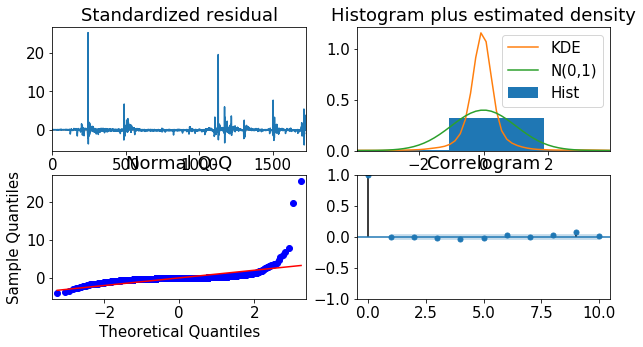

In [34]:
model.plot_diagnostics()
plt.show()

In [35]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

27.785425580723864
19.544626594475385


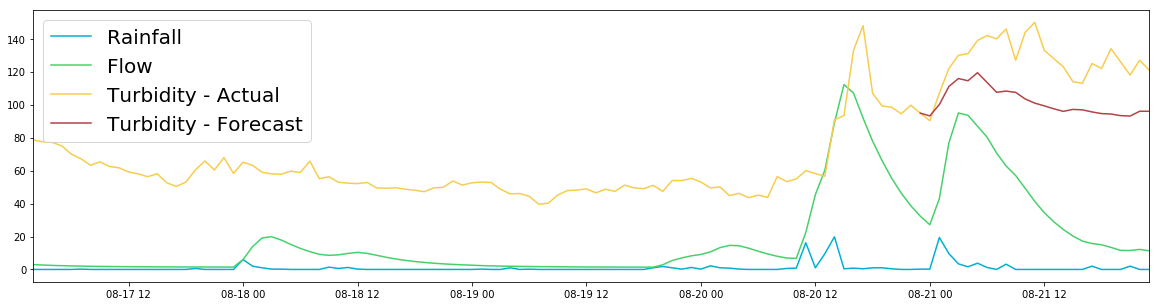

In [179]:
n = 24
X_train = X.iloc[:-n]
X_test = X.iloc[-n:]
y_train = y.iloc[:-n]
y_test = y.iloc[-n:]
model.fit(y_train, X_train)
forecast = model.predict(n_periods=n, exogenous=X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, forecast)))
print(MAPE(y_test, forecast))
forecast = pd.DataFrame(forecast, index=y_test.index, columns=['Turbidity, NTU'])
plt.figure(figsize=(20,5))
f = (pd.DataFrame(y_train[-1:])).append(forecast)
i = 1850
plt.plot(ntu['Rainfall, mm'].iloc[i:], label='Rainfall', color='#01afd1')
plt.plot(ntu['Flow'].iloc[i:], label='Flow', color='#47d06a')
plt.plot(ntu['Turbidity, NTU'].iloc[i:], label='Turbidity - Actual', color='#f6cd4c')
plt.plot(f, label='Turbidity - Forecast', color='#af4345')
plt.xlim(['2018-08-17 02:00','2018-08-21 23:00'])
plt.legend(fontsize=20, loc='upper left')
plt.savefig('002.png', dpi=500, transparent=True, bbox_inches = 'tight')

4.552695112568706
3.388411067536602


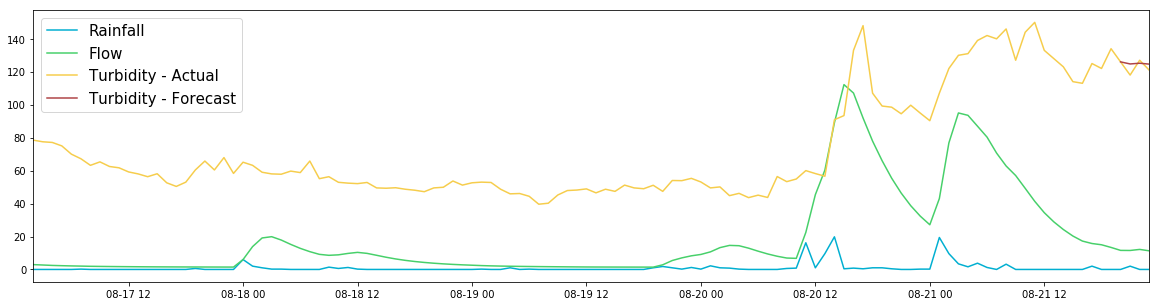

In [180]:
n = 3
X_train = X.iloc[:-n]
X_test = X.iloc[-n:]
y_train = y.iloc[:-n]
y_test = y.iloc[-n:]
model.fit(y_train, X_train)
forecast = model.predict(n_periods=n, exogenous=X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, forecast)))
print(MAPE(y_test, forecast))
forecast = pd.DataFrame(forecast, index=y_test.index, columns=['Turbidity, NTU'])
plt.figure(figsize=(20,5))
f = (pd.DataFrame(y_train[-1:])).append(forecast)
i = 1850
plt.plot(ntu['Rainfall, mm'].iloc[i:], label='Rainfall', color='#01afd1')
plt.plot(ntu['Flow'].iloc[i:], label='Flow', color='#47d06a')
plt.plot(ntu['Turbidity, NTU'].iloc[i:], label='Turbidity - Actual', color='#f6cd4c')
plt.plot(f, label='Turbidity - Forecast', color='#af4345')
plt.xlim(['2018-08-17 02:00','2018-08-21 23:00'])
plt.legend(fontsize=15)
plt.savefig('3hr.png', dpi=500, transparent=True, bbox_inches = 'tight')

15.936271496868798
11.66122425418842


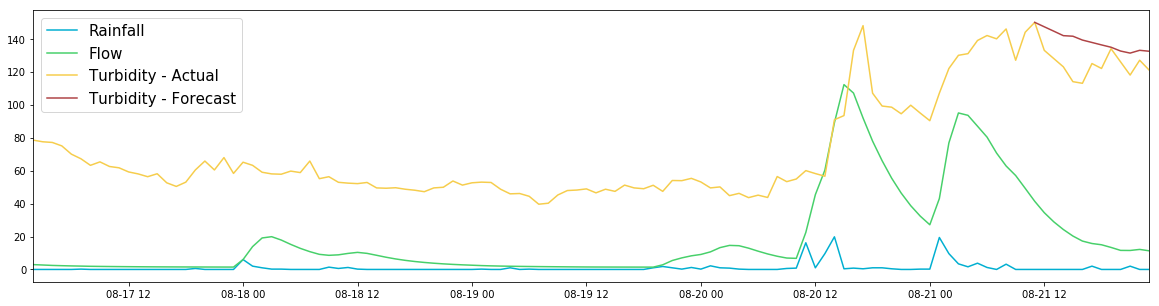

In [181]:
n = 12
X_train = X.iloc[:-n]
X_test = X.iloc[-n:]
y_train = y.iloc[:-n]
y_test = y.iloc[-n:]
model.fit(y_train, X_train)
forecast = model.predict(n_periods=n, exogenous=X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, forecast)))
print(MAPE(y_test, forecast))
forecast = pd.DataFrame(forecast, index=y_test.index, columns=['Turbidity, NTU'])
plt.figure(figsize=(20,5))
f = (pd.DataFrame(y_train[-1:])).append(forecast)
i = 1850
plt.plot(ntu['Rainfall, mm'].iloc[i:], label='Rainfall', color='#01afd1')
plt.plot(ntu['Flow'].iloc[i:], label='Flow', color='#47d06a')
plt.plot(ntu['Turbidity, NTU'].iloc[i:], label='Turbidity - Actual', color='#f6cd4c')
plt.plot(f, label='Turbidity - Forecast', color='#af4345')
plt.xlim(['2018-08-17 02:00','2018-08-21 23:00'])
plt.legend(fontsize=15)
# plt.savefig('3hr.png', dpi=500, transparent=True, bbox_inches = 'tight')

32.88263476646477
26.972359110343476


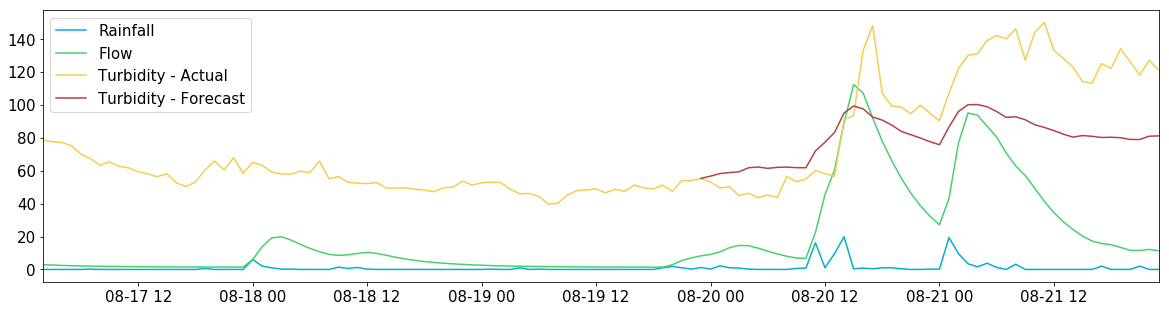

In [393]:
n = 48
X_train = X.iloc[:-n]
X_test = X.iloc[-n:]
y_train = y.iloc[:-n]
y_test = y.iloc[-n:]
model.fit(y_train, X_train)
forecast = model.predict(n_periods=n, exogenous=X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, forecast)))
print(MAPE(y_test, forecast))
forecast = pd.DataFrame(forecast, index=y_test.index, columns=['Turbidity, NTU'])
plt.figure(figsize=(20,5))
f = (pd.DataFrame(y_train[-1:])).append(forecast)
i = 1850
plt.plot(ntu['Rainfall, mm'].iloc[i:], label='Rainfall', color='#01afd1')
plt.plot(ntu['Flow'].iloc[i:], label='Flow', color='#47d06a')
plt.plot(ntu['Turbidity, NTU'].iloc[i:], label='Turbidity - Actual', color='#f6cd4c')
plt.plot(f, label='Turbidity - Forecast', color='#af4345')
plt.xlim(['2018-08-17 02:00','2018-08-21 23:00'])
plt.legend(fontsize=15)
plt.savefig('48hr.png', dpi=500, transparent=True, bbox_inches = 'tight')

25.93665558172136
29.47922351898021


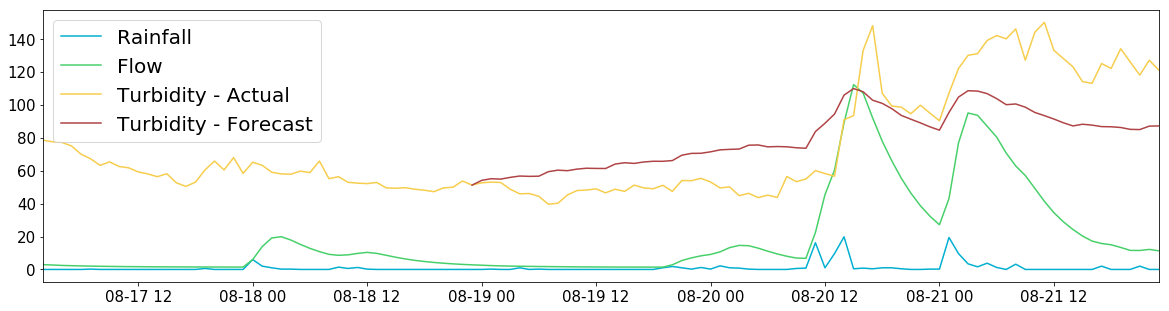

In [430]:
n = 72
X_train = X.iloc[:-n]
X_test = X.iloc[-n:]
y_train = y.iloc[:-n]
y_test = y.iloc[-n:]
model.fit(y_train, X_train)
forecast = model.predict(n_periods=n, exogenous=X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, forecast)))
print(MAPE(y_test, forecast))
forecast = pd.DataFrame(forecast, index=y_test.index, columns=['Turbidity, NTU'])
plt.figure(figsize=(20,5))
# plt.plot(y_pred, label='Prediction')
f = (pd.DataFrame(y_train[-1:])).append(forecast)
i = 1850
plt.plot(ntu['Rainfall, mm'].iloc[i:], label='Rainfall', color='#01afd1')
plt.plot(ntu['Flow'].iloc[i:], label='Flow', color='#47d06a')
plt.plot(ntu['Turbidity, NTU'].iloc[i:], label='Turbidity - Actual', color='#f6cd4c')
plt.plot(f, label='Turbidity - Forecast', color='#af4345')
plt.xlim(['2018-08-17 02:00','2018-08-21 23:00'])
plt.legend(fontsize=20, loc='upper left')
plt.savefig('72hr.png', dpi=500, transparent=True, bbox_inches = 'tight')

41.82105295951168
31.44214591856363


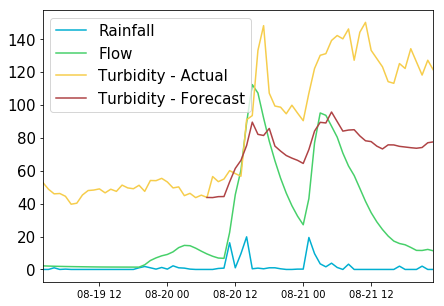

In [243]:
n = 40
X_train = X.iloc[:-n]
X_test = X.iloc[-n:]
y_train = y.iloc[:-n]
y_test = y.iloc[-n:]
model.fit(y_train, X_train)
forecast = model.predict(n_periods=n, exogenous=X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, forecast)))
print(MAPE(y_test, forecast))
forecast = pd.DataFrame(forecast, index=y_test.index, columns=['Turbidity, NTU'])
plt.figure(figsize=(7,5))
# plt.plot(y_pred, label='Prediction')
f = (pd.DataFrame(y_train[-1:])).append(forecast)
i = 1850
plt.plot(ntu['Rainfall, mm'].iloc[i:], label='Rainfall', color='#01afd1')
plt.plot(ntu['Flow'].iloc[i:], label='Flow', color='#47d06a')
plt.plot(ntu['Turbidity, NTU'].iloc[i:], label='Turbidity - Actual', color='#f6cd4c')
plt.plot(f, label='Turbidity - Forecast', color='#af4345')
plt.xlim(['2018-08-19 02:00','2018-08-21 23:00'])
plt.xticks(fontsize=10)
plt.legend(fontsize=15)
plt.savefig('trb.png', dpi=500, transparent=True, bbox_inches = 'tight')